In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)

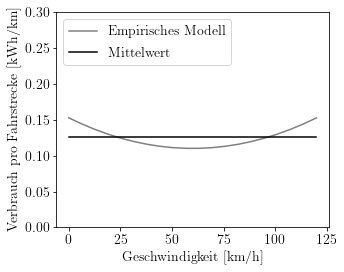

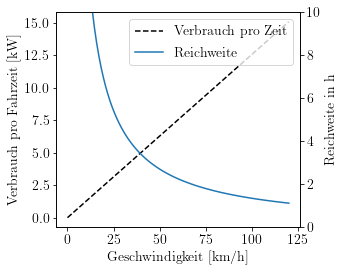

In [84]:
const_consumption = 0.15
x_range = [0, 120]
x = np.linspace(*x_range, 20)

k = x_range[0] + (x_range[-1] - x_range[0]) / 2
d = const_consumption - 0.04
c = (const_consumption + 0.0025 - d) / k**2
y = c * (x - k)**2 + d

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x, y,'k-', alpha=.5, label='Empirisches Modell')
ax.plot(x, len(x) * [y.mean()], 'k-', label='Mittelwert')
ax.set_ylim([0, 0.3])
ax.legend(loc='upper left')
ax.set_ylabel('Verbrauch pro Fahrstrecke [kWh/km]')
ax.set_xlabel('Geschwindigkeit [km/h]')
ticks = ax.get_xticks()
plt.tight_layout()
fig.savefig('img/consumption_dist.pdf')

v = np.linspace(*x_range, 10)
per_time = y.mean() * v
fig, ax = plt.subplots(figsize=(fig.get_figwidth(), fig.get_figheight()))
line1, = ax.plot(v, per_time, 'k--', label='Verbrauch pro Zeit')
ax.set_ylabel('Verbrauch pro Fahrzeit [kW]')
ax.set_xlabel('Geschwindigkeit [km/h]')
ax.set_xticks(ticks)
battery_capacity = 17 # kWh
x = np.linspace(*x_range, 100)
x = x[1:]

range_time = battery_capacity / (y.mean() * x)
ax2 = ax.twinx()
line2, = ax2.plot(x, range_time, label='Reichweite')
ax2.set_ylabel('Reichweite in h')
ax2.set_ylim(0, 10)
plt.legend((line1, line2), ('Verbrauch pro Zeit', 'Reichweite'))

plt.tight_layout()
fig.savefig('img/consumption_time.pdf')
